<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session7/BMEN35_cinc2017_assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7
## Fill in your name below
Albert Ahnlide

## Your mission is now the following:

You will use data from the Computing in Cardiology challenge 2017 (as was explained in the lectures) (https://physionet.org/content/challenge-2017/1.0.0/). **Take your time to read the page**. The training set contains data from more that 8000 recordings. There are four classes / labels in the datasets (Normal, AF (Atrial Fibrillation), Other rhytm, Noisy). The validation contains data from 300 recordings.

**You will download a zip-file from the Canvas-page for the assignment**. The zip-file contains six files:

*   cinc2017_features_training.csv
*   cinc2017_features_validation.csv
*   cinc2017_raw_train.csv **(Very large file)**
*   cinc2017_raw_validation.csv
*   cinc2017_labels_train.csv
*   cinc2017_labels_validation.csv
*   andreotti_et_al.h5

You can choose to make a model based on "features" and or a deep learning model based on the "raw" data. There is a premade/pretrained model that you can load and look at for inspiration (andreotti_et_al.h5). It is rather large. Perhaps you can get similar scores with a simpler model.

You can find more information on the features and the model (andreotti_et_al.h5) in this paper https://www.cinc.org/archives/2017/pdf/360-239.pdf

You also need to implement the scoring according to the webpage. The final score is the **average f1 score**. For this you might want to check out the classification_report and confusion_matrix in sklearn.

For this assignment there is more data than in the other. If you choose to go for a deep learning model, be prepared for longer training times.

If you look through the other notebooks, you will find how to load csv files and all other things you need for this assignment.

You can have a look at the leaderboard on the webpage to see what scores the contestants where able to get.

Try atleast three models and see what scores you can get with each model. If you perform some hyperparameter optimization, make sure you don't use the validation set for this. The validation set is for getting the final scores only.

You will start by importing some of the usual suspects. You know what to do know.

In [2]:
# You know this now.
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Read CSV files
training_data = pd.read_csv("cinc2017_files/cinc2017_features_training.csv").to_numpy()
training_labels = pd.read_csv("cinc2017_files/cinc2017_labels_training.csv").to_numpy()


validation_data = pd.read_csv("cinc2017_files/cinc2017_features_validation.csv").to_numpy()
validation_labels = pd.read_csv("cinc2017_files/cinc2017_labels_validation.csv").to_numpy()

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(training_data, training_labels, test_size=0.2, random_state=0)

              precision    recall  f1-score   support

      Normal       0.74      0.69      0.72       131
          AF       0.76      0.95      0.84      1013
 Other rythm       0.67      0.36      0.47       508
       Noisy       0.69      0.61      0.65        54

    accuracy                           0.74      1706
   macro avg       0.71      0.65      0.67      1706
weighted avg       0.73      0.74      0.72      1706



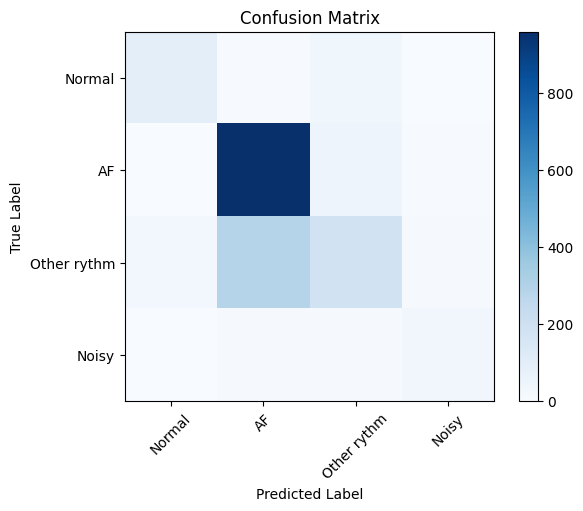

              precision    recall  f1-score   support

      Normal       0.86      0.74      0.80        50
          AF       0.73      0.95      0.83       149
 Other rythm       0.56      0.20      0.29        70
       Noisy       0.75      0.90      0.82        30

    accuracy                           0.74       299
   macro avg       0.72      0.70      0.68       299
weighted avg       0.71      0.74      0.70       299



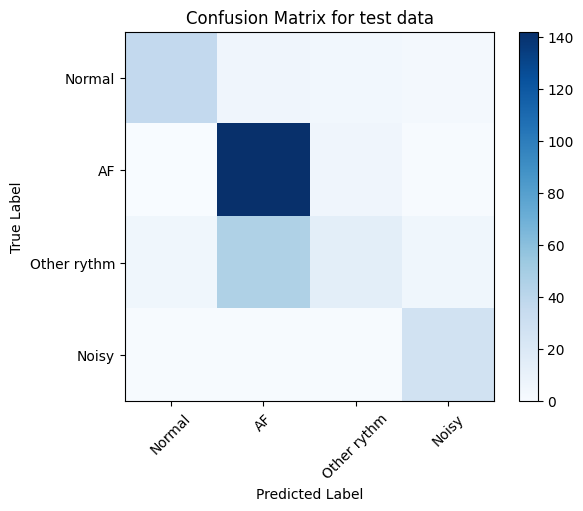

In [6]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier



#clf = RandomForestClassifier()
#clf = KNeighborsClassifier(n_neighbors=5)
clf = AdaBoostClassifier(learning_rate=0.5)
#clf = BaggingClassifier()



clf.fit(X_train, y_train.ravel())
y_pred_classes = clf.predict(X_validation)


# Print classification report with class names
class_names = ['Normal', 'AF', 'Other rythm', 'Noisy']  # Replace with your actual class names
print(classification_report(y_validation, y_pred_classes, target_names=class_names))

# Plot confusion matrix with class names
conf_matrix = confusion_matrix(y_validation, y_pred_classes)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




# For the test-data (cinc2017_features_validation
y_pred_classes = clf.predict(validation_data)

print(classification_report(validation_labels, y_pred_classes, target_names=class_names))

# Plot confusion matrix with class names
conf_matrix = confusion_matrix(validation_labels, y_pred_classes)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for test data')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Results: 

The validation data I used was obtained through splitting the feature-data in to both training data as well as validation data. Later, the validation data from the folder cinc2017 was used as the test data for the model.
The average f1-scores have been shown both for the validation data as well as the test data in this table: 


| Model       | Validation | Test  |
|-------------|------------|-------|
| RandomForest| 0.7875     | 0.5525|
| KNN         | 0.6575     | 0.745 |
| AdaBoost    | 0.67       | 0.685 |
| Bagging     | 0.7475     | 0.5425|



Here we can see that the RandomForest performed the best for the validation data while the KNN was the best at classifying the test data. Because of this, it seems like the 
